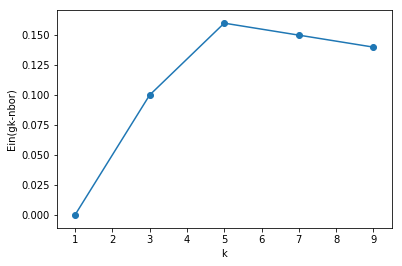

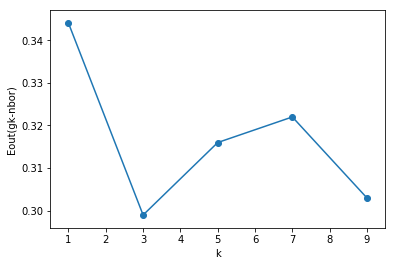

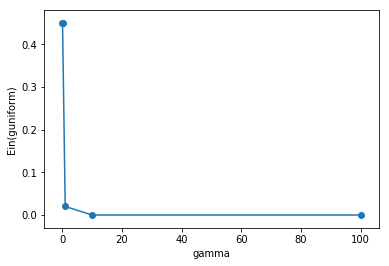

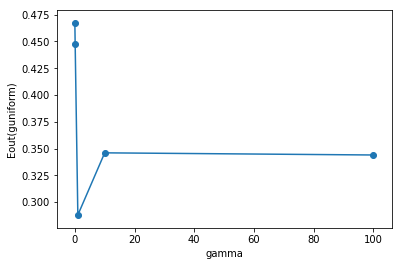

In [247]:
#11,12,13,14
import numpy as np
import matplotlib.pyplot as plt

train = np.loadtxt('hw4_train.dat.txt')
test = np.loadtxt('hw4_test.dat.txt')
train_x = train[:,:-1]
train_y = train[:,-1]
test_x = test[:,:-1]
test_y = test[:,-1]

def KNN(train_x,train_y,k,test_x):
    result = []
    for test_data in test_x:
        predict = np.sum((train_x-test_data)**2,axis=1)
        arg = np.argsort(predict)
        select = arg[:k]
        predict_y = []
        for i in select:
            predict_y.append(train_y[i])
        result.append(np.sign(np.sum(predict_y)))
    return np.array(result)

#11
k = [1,3,5,7,9]
E_in = []
for num in k:
    result = KNN(train_x,train_y,num,train_x)
    E_in.append(np.sum(result != train_y)/train_y.shape[0])

plt.plot(k,E_in)
plt.scatter(k,E_in)
plt.xlabel('k')
plt.ylabel('Ein(gk-nbor)')
plt.savefig('Q11')
plt.show()
#12
k = [1,3,5,7,9]
E_out = []
for num in k:
    result = KNN(train_x,train_y,num,test_x)
    E_out.append(np.sum(result != test_y)/test_y.shape[0])

plt.plot(k,E_out)
plt.scatter(k,E_out)
plt.xlabel('k')
plt.ylabel('Eout(gk-nbor)')
plt.savefig('Q12')
plt.show()
#13 14
def g_uniform(train_x,train_y,test_x,gamma):
    result = []
    for test_data in test_x:
        predict = np.sign(np.sum(np.exp(-1*gamma*np.sum((train_x-test_data)**2,axis=1))*train_y))
        result.append(predict)
    return np.array(result)

gamma = [0.001,0.1,1,10,100]
#13
E_in = []
for i in gamma:
    result = g_uniform(train_x,train_y,train_x,i)
    E_in.append(np.sum(result != train_y)/train_y.shape[0])
    
plt.plot(gamma,E_in)
plt.scatter(gamma,E_in)
plt.xlabel('gamma')
plt.ylabel('Ein(guniform)')
plt.savefig('Q13')
plt.show()
#14
E_out = []
for i in gamma:
    result = g_uniform(train_x,train_y,test_x,i)
    E_out.append(np.sum(result != test_y)/test_y.shape[0])
plt.plot(gamma,E_out)
plt.scatter(gamma,E_out)
plt.xlabel('gamma')
plt.ylabel('Eout(guniform)')
plt.savefig('Q14')
plt.show()

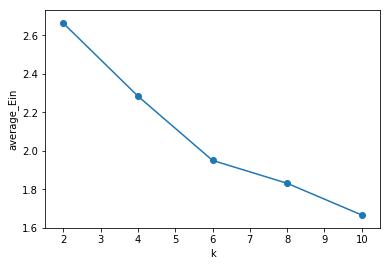

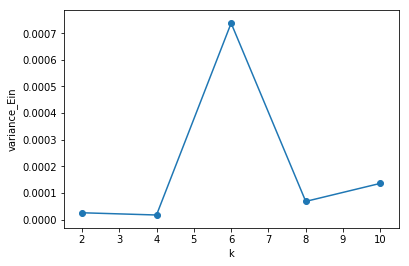

In [624]:
#15,16
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('hw4_nolabel_train.dat.txt')
np.random.seed = 1
iteration = 500
K = [2,4,6,8,10]

def Error(mu,train_x):
    k = len(mu)
    error = 0
    for x in train_x:
        error += np.min(np.sum((mu-x)**2,axis=1))
    return error/train_x.shape[0]

def K_means(k,train_x,iteration):
    Ein = []
    for i in range(iteration):
        cluster = []
        for j in range(k):
            cluster.append([])
        if i==0:
            random = np.random.permutation(train_x.shape[0])[:k]
            mu = train_x[random]
            #print(mu)
            for x in train_x:
                diff = np.sum(((mu-x)**2),axis=1)
                m = np.argsort(diff)[0]
                cluster[m].append(x)
            for j in range(len(cluster)):
                mu[j] = np.sum(np.array(cluster[j]),axis=0)/np.array(cluster[j]).shape[0]
            Ein.append(Error(mu,train_x))
        else:
            for x in train_x:
                diff = np.sum(((mu-x)**2),axis=1)
                m = np.argsort(diff)[0]
                cluster[m].append(x)
            for j in range(len(cluster)):
                mu[j] = np.sum(np.array(cluster[j]),axis=0)/np.array(cluster[j]).shape[0]
            Ein.append(Error(mu,train_x))
    return mu,np.array(Ein)


#15,16
avg_Ein = []
variance_Ein = []
for k in K:
    mu,Ein = K_means(k,data,iteration)
    avg = np.sum(Ein)/len(Ein)
    avg_Ein.append(avg)
    variance=np.sum((Ein-avg)**2)/len(Ein)
    variance_Ein.append(variance)
    
plt.plot(K,avg_Ein)
plt.scatter(K,avg_Ein)
plt.xlabel('k')
plt.ylabel('average_Ein')
plt.savefig('Q15')
plt.show()

plt.plot(K,variance_Ein)
plt.scatter(K,variance_Ein)
plt.xlabel('k')
plt.ylabel('variance_Ein')
plt.savefig('Q16')
plt.show()